# THE SPARKS FOUNDATION

#  Task 1: Prediction using Supervised ML

# Author: Abhinav Sarpal

In [28]:
pip install termcolor

In [29]:
# colored text and background.

In [30]:
pip install pyfiglet  

In [31]:
# provides an interface for games

In [34]:
from termcolor import cprint 
from pyfiglet import figlet_format
text="TASK: 1"
terminal_width=20
cprint(figlet_format(text, font="standard"), "green")
cprint('In this regression task we will predict the percentage of marks that a student is expected to score based upon the number of hours they studied. A simple linear regression task, it involves just two variables.','blue')



 _____  _    ____  _  __    _ 
|_   _|/ \  / ___|| |/ /_  / |
  | | / _ \ \___ \| ' /(_) | |
  | |/ ___ \ ___) | . \ _  | |
  |_/_/   \_\____/|_|\_(_) |_|
                              

In this regression task we will predict the percentage of marks that a student is expected to score based upon the number of hours they studied. A simple linear regression task, it involves just two variables.


# Importing all necessary Libraries

In [35]:
import pandas as p
import numpy as n
import matplotlib.pyplot as plt
import seaborn as s
import warnings
warnings.filterwarnings("ignore")
%matplotlib inline

# Reading data from link given

In [36]:
url = "http://bit.ly/w-data"
data = p.read_csv(url)
cprint("Data imported successfully",'blue')


Data imported successfully


# Discovering/Analyzing the data 

In [37]:
data.head(5) # give first 5 row command name attribute and variables

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


In [38]:
data.tail()       # give last 5 rows of the dataset

,Hours,Scores
20,2.7,30
21,4.8,54
22,3.8,35
23,6.9,76
24,7.8,86


In [39]:
data.shape  #shows number of rows and columns in the dataset

(25, 2)

In [40]:
data.describe()        # Generate descriptive statistics

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


In [41]:
data.info() #information about dataset

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Hours   25 non-null     float64
 1   Scores  25 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 528.0 bytes


In [42]:
data.corr()

,Hours,Scores
Hours,1.000000,0.976191
Scores,0.976191,1.000000


# STEP 1: Data validation and Preprocessing

---



In [43]:
df= data.dropna()  #used to remove rows and columns with Null/NaN

In [44]:
df.shape

(25, 2)

In [45]:
df.duplicated()   #Checking for duplicate values and eliminating them one by one

0     False
1     False
2     False
3     False
4     False
5     False
6     False
7     False
8     False
9     False
10    False
11    False
12    False
13    False
14    False
15    False
16    False
17    False
18    False
19    False
20    False
21    False
22    False
23    False
24    False
dtype: bool

In [46]:
sum(df.duplicated())

0

In [47]:
df.isnull().sum()    #Checking for missing values

Hours     0
Scores    0
dtype: int64

In [48]:
num=df._get_numeric_data()  #Checking for numeric data if negative values are there need to be replaced
num[num<0]=0
data

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30
5,1.5,20
6,9.2,88
7,5.5,60
8,8.3,81
9,2.7,25


In [49]:
cprint('("Minimum value of hours is:",df.Hours.min())','red')
cprint('("Maximum value of hours is:",df.Hours.max())','yellow')
cprint('("Minimum value of scores is:",df.Scores.min())','grey')
cprint('("Maximum value of scores is:",df.Scores.max())','blue')

("Minimum value of hours is:",df.Hours.min())
("Maximum value of hours is:",df.Hours.max())
("Minimum value of scores is:",df.Scores.min())
("Maximum value of scores is:",df.Scores.max())


In [50]:
print("HOURS:",sorted(df['Hours'].unique())) #Printing range or unique values

HOURS: [1.1, 1.5, 1.9, 2.5, 2.7, 3.2, 3.3, 3.5, 3.8, 4.5, 4.8, 5.1, 5.5, 5.9, 6.1, 6.9, 7.4, 7.7, 7.8, 8.3, 8.5, 8.9, 9.2]


In [51]:
print("SCORES:",sorted(df['Scores'].unique())) #Printing range or unique values

SCORES: [17, 20, 21, 24, 25, 27, 30, 35, 41, 42, 47, 54, 60, 62, 67, 69, 75, 76, 81, 85, 86, 88, 95]


#  Exploration of data and it's visual analysis 

In [52]:
p.crosstab(df.Hours,df.Scores) #finding relationship between different values of Hours and Scores among each other

Scores,17,20,21,24,25,27,30,35,41,42,47,54,60,62,67,69,75,76,81,85,86,88,95
Hours,,,,,,,,,,,,,,,,,,,,,,,
1.1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1.5,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1.9,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2.5,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2.7,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3.2,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3.3,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0
3.5,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3.8,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


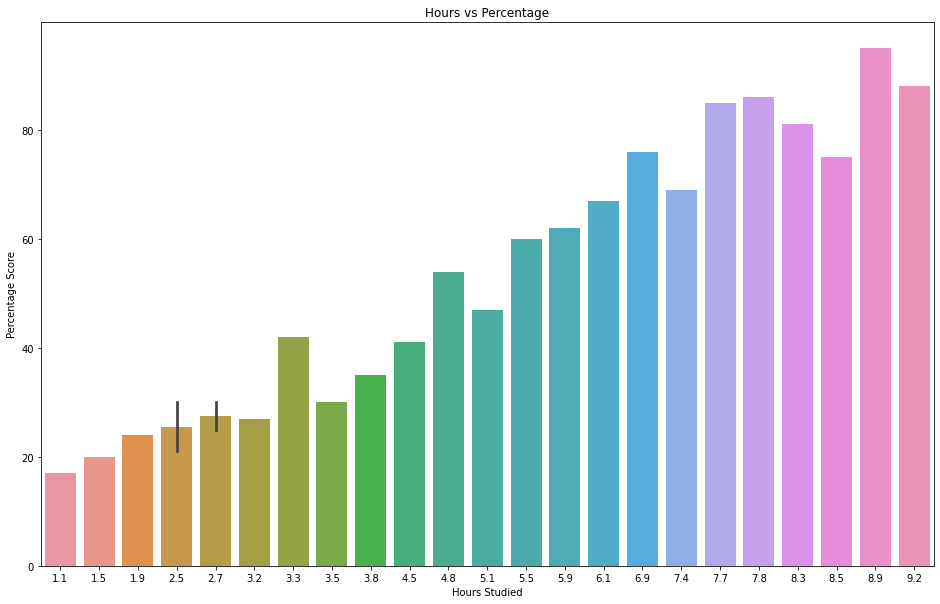

In [53]:
# Plotting the distribution of scores
fig ,ax = plt.subplots(figsize=(16,10))
ax = s.barplot(x='Hours',y='Scores',data=df)
ax.set(ylabel='Percentage Score',title = 'Hours vs Percentage',xlabel='Hours Studied')
plt.show()

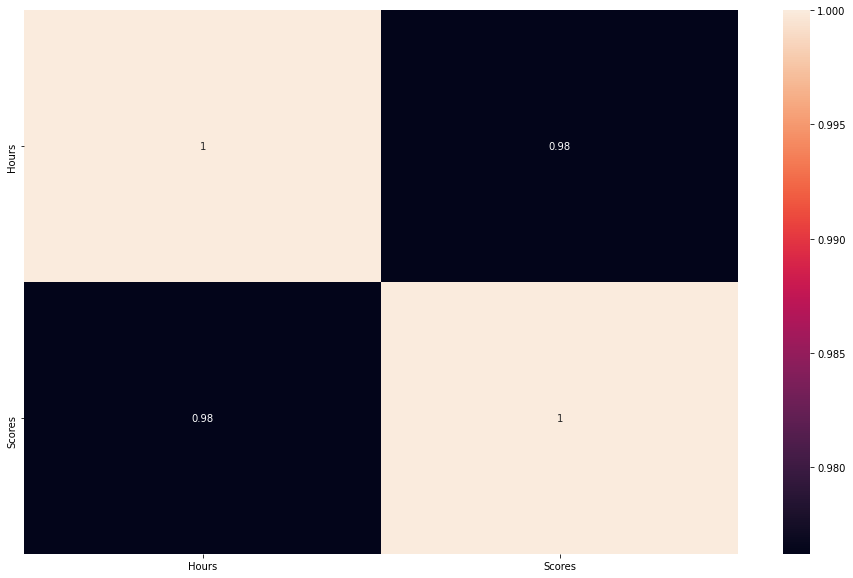

In [54]:
# Heatmap : two-dimensional graphical representation of data
fig ,ax = plt.subplots(figsize=(16,10))
s.heatmap(df.corr(), ax=ax, annot=True)

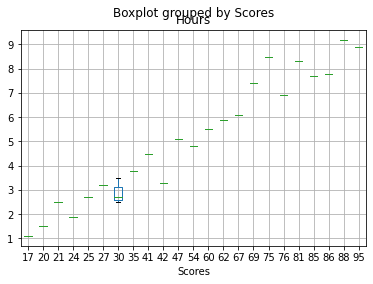

In [55]:
df.boxplot(column='Hours', by='Scores') #Scores and hours relation

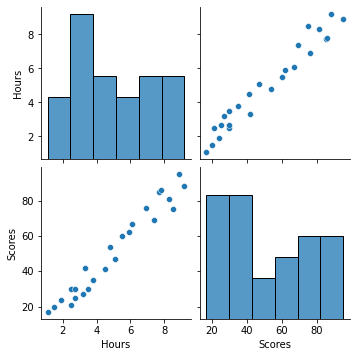

In [56]:
s.pairplot(df)     #Hours and Scores related

In [57]:
def function(x):
    if x<35:
        return "bad"
    elif 35<=x<=50:
        return "fair"
    elif 50<x<75:
        return "average"
    elif 75<=x<=90:
        return "good"
    else:
        return "excellent"

In [58]:
data["Grade"] = data["Scores"].apply(function)

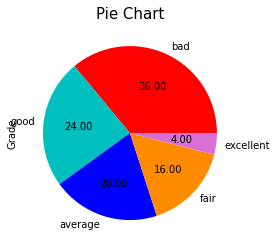

In [59]:
# plotting pie plot for grades
plt.figure(figsize=(20,4))
data["Grade"].value_counts().plot(kind = "pie",autopct="%.2f",colors = ["r","c","b","darkorange","orchid"])
plt.title("Pie Chart",fontsize=15)
plt.show()